Based on the directory structure provided, I'll guide you through creating a Jupyter Notebook that loads the results from the JSON files in the `06_results/json` directory and plots the relevant outputs. Here’s a step-by-step approach:

### 1. Import Required Libraries

Start by importing the necessary libraries

In [26]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

### 2. Define a Function to Load JSON Results

Create a function that loads the JSON data from a specified file.

In [27]:
def load_results(json_path):
    with open(json_path, 'r') as f:
        results = json.load(f)
    return results

### 3. Define a Function to Plot the Results

Create a function that plots the predictions, MSE, and other relevant metrics

In [42]:
def plot_results(results, title='Model Results'):
    predictions = np.array(results['predictions'])
    mse = results.get('mse', [])
    mae = results.get('mae', [])
    rmse = results.get('rmse', [])
    r2 = results.get('r2', [])
    confusion_matrices = np.array(results.get('confusion_matrices', []))

    # Create subplots for predictions, MSE, MAE, RMSE, and R-squared
    fig, axes = plt.subplots(5, 1, figsize=(12, 24))

    # Plot predictions
    for i in range(predictions.shape[1]):
        axes[0].plot(predictions[:, i], label=f'Month {i+1} Predictions')
    axes[0].set_title(f'{title} - Predictions')
    axes[0].set_xlabel('Time Step')
    axes[0].set_ylabel('Predicted Values')
    axes[0].legend()

    # Plot MSE
    if mse:
        axes[1].plot(mse, marker='o', linestyle='-')
        axes[1].set_title(f'{title} - Mean Squared Error')
        axes[1].set_xlabel('Time Step')
        axes[1].set_ylabel('MSE')

    # Plot MAE
    if mae:
        axes[2].plot(mae, marker='o', linestyle='-')
        axes[2].set_title(f'{title} - Mean Absolute Error')
        axes[2].set_xlabel('Time Step')
        axes[2].set_ylabel('MAE')

    # Plot RMSE
    if rmse:
        axes[3].plot(rmse, marker='o', linestyle='-')
        axes[3].set_title(f'{title} - Root Mean Squared Error')
        axes[3].set_xlabel('Time Step')
        axes[3].set_ylabel('RMSE')

    # Plot R-squared
    if r2:
        axes[4].plot(r2, marker='o', linestyle='-')
        axes[4].set_title(f'{title} - R-Squared')
        axes[4].set_xlabel('Time Step')
        axes[4].set_ylabel('R2')

    plt.tight_layout()
    plt.show()
    
    # Plot Confusion Matrices
    if confusion_matrices.size > 0:
        for i, cm in enumerate(confusion_matrices):
            plt.figure(figsize=(10, 8))  # Increase figure size to improve visibility
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 10})
            plt.title(f'{title} - Confusion Matrix for Month {i+1}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()


### 4. Load and Plot a Specific JSON File

In the next cell, specify the path to the JSON file you want to load and plot.



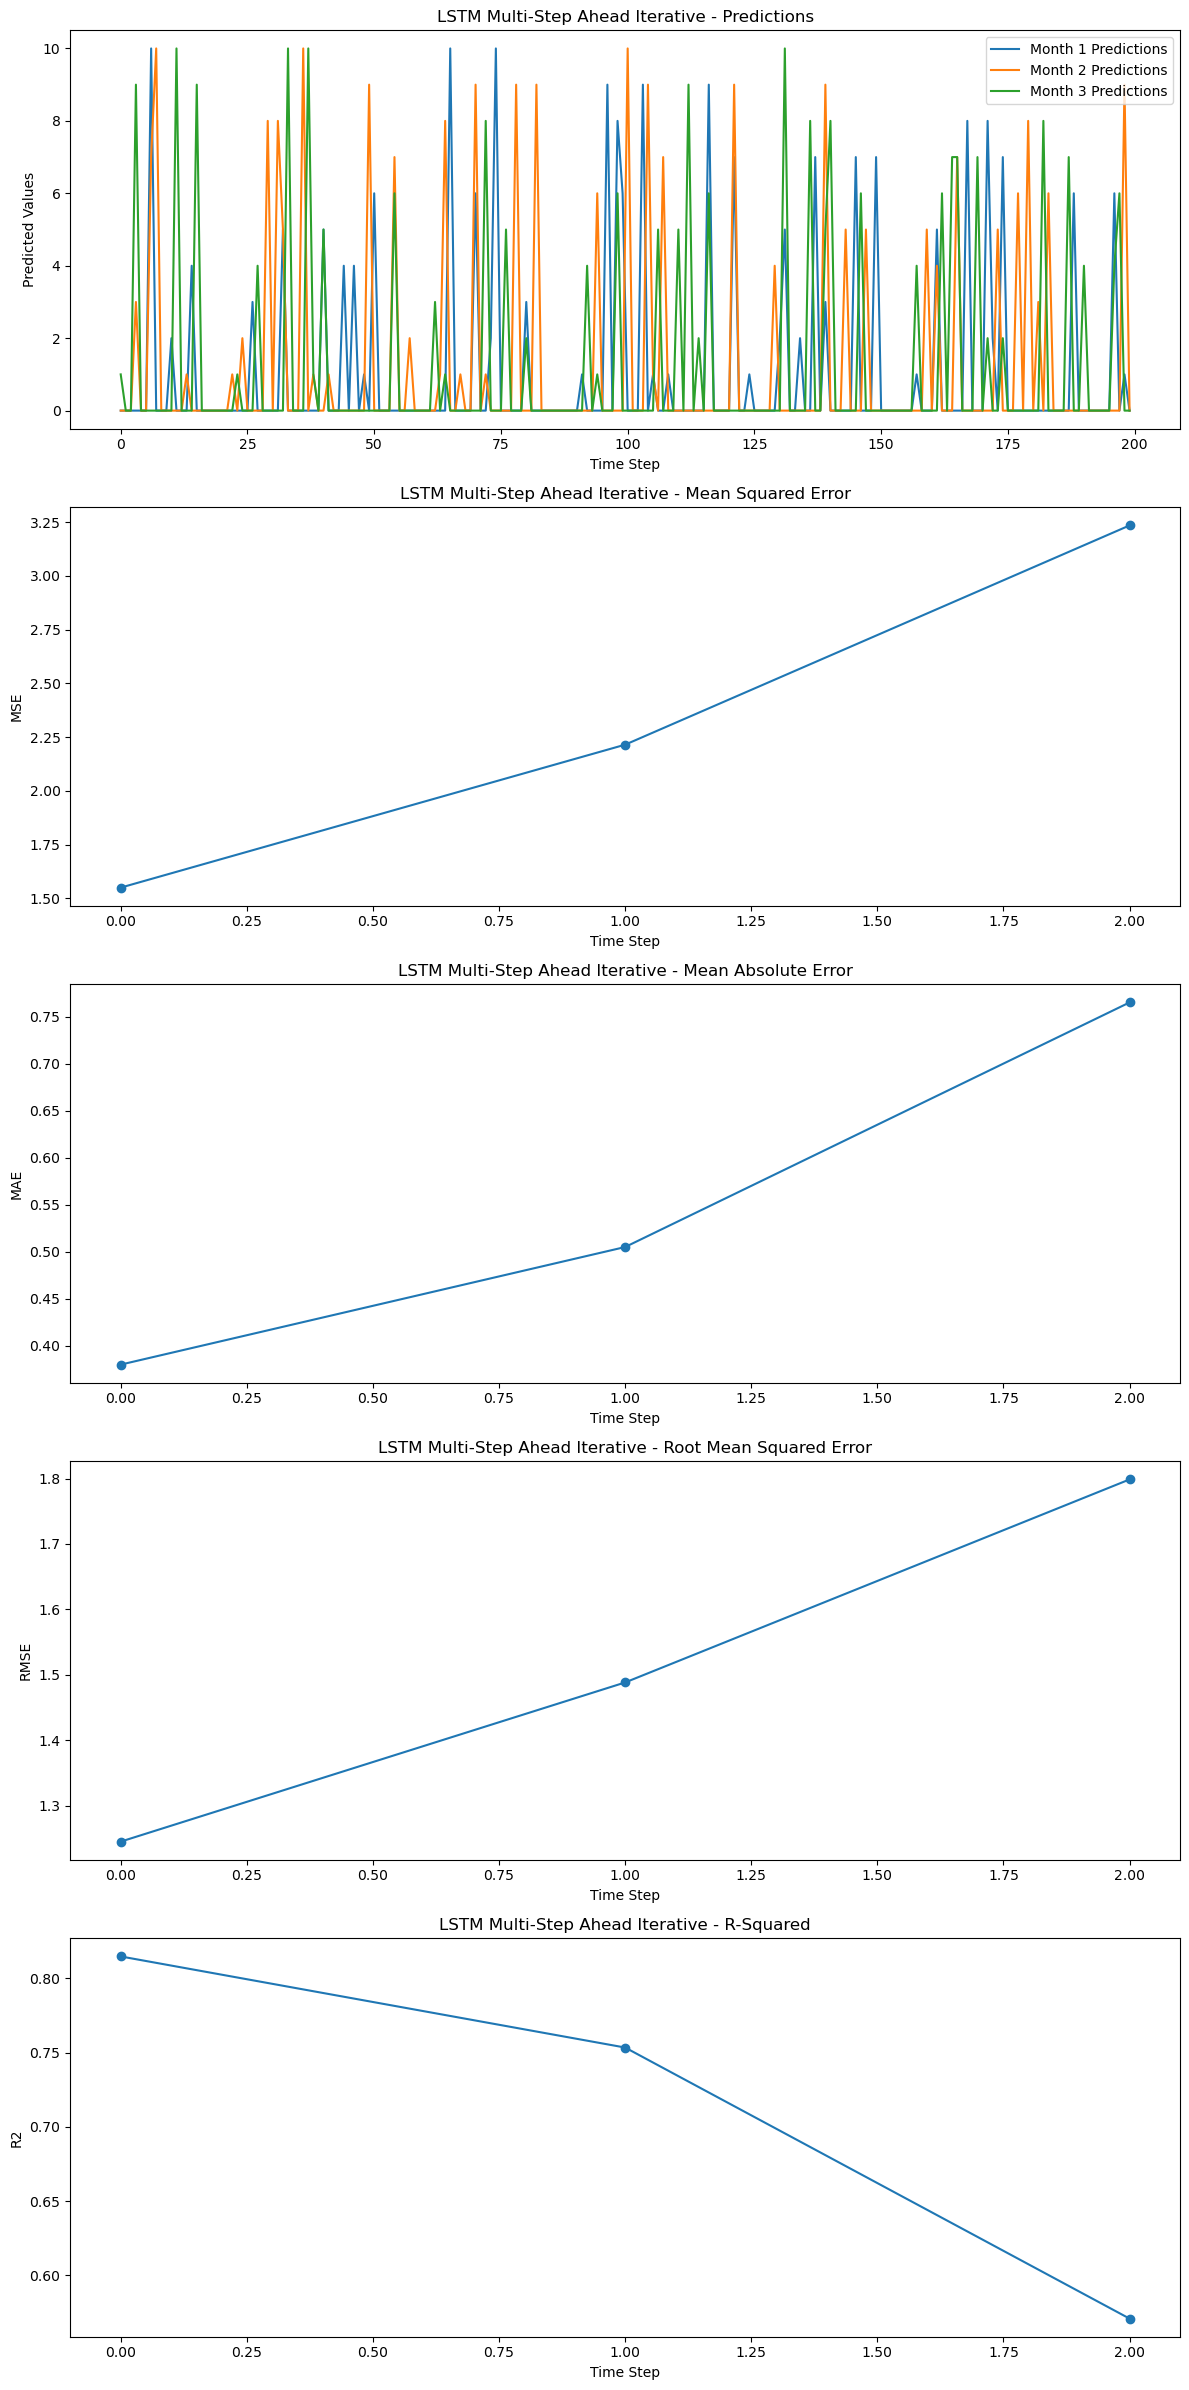

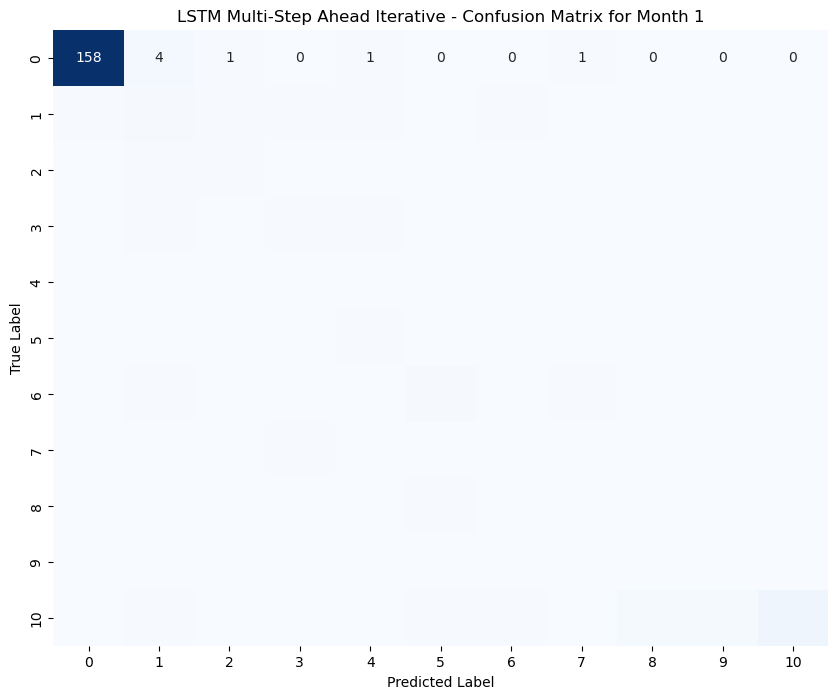

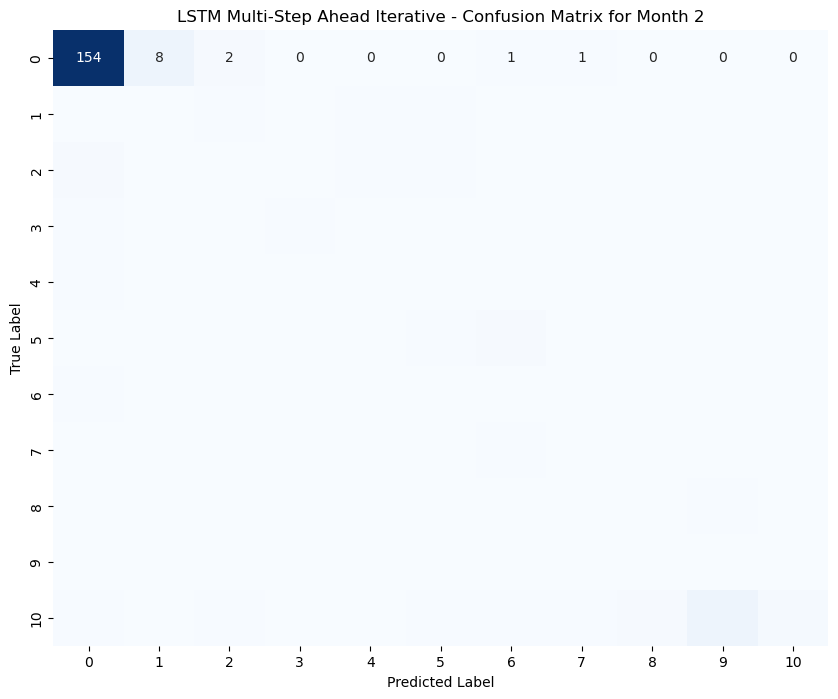

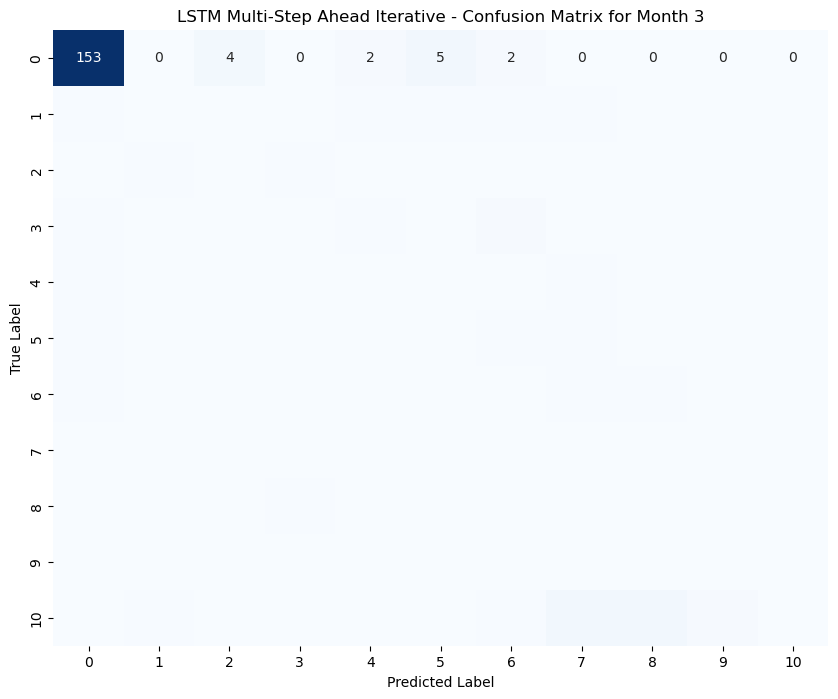

In [43]:
# Specify the path to the JSON file
json_file_path = './json/LSTM_multi-step-ahead-iterative_seq3_n9_ep100_bs32_lr0.001_hu64.json'

# Load the results
results = load_results(json_file_path)

# Plot the results
plot_results(results, title='LSTM Multi-Step Ahead Iterative')

### 5. Adding Multiple Files for Comparison (Optional)

If you want to compare multiple results, you can load and plot them in the same notebook.



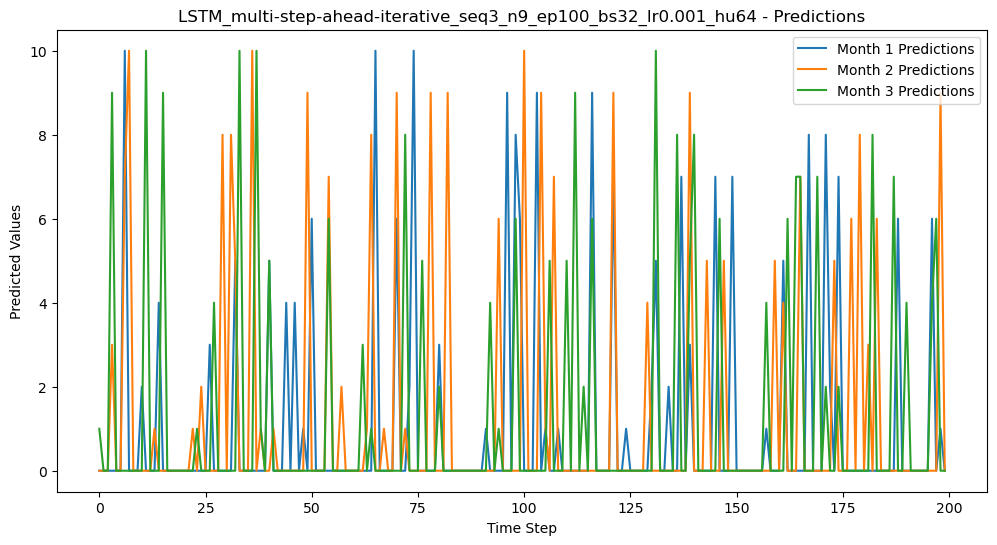

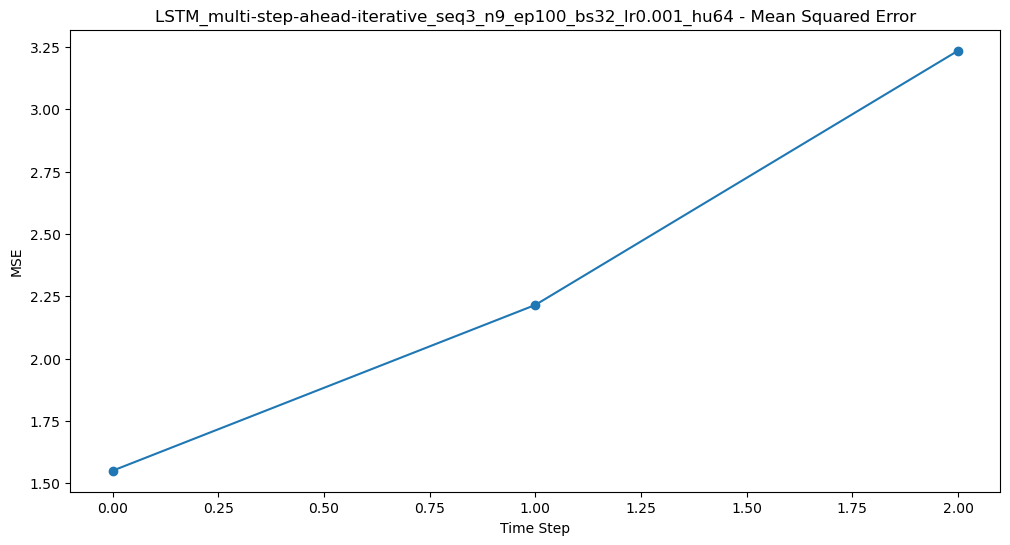

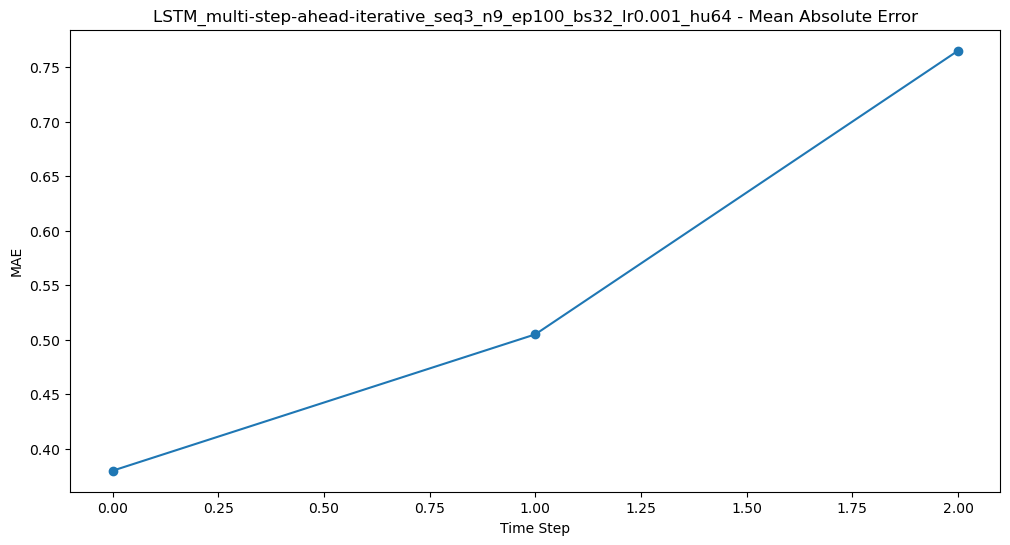

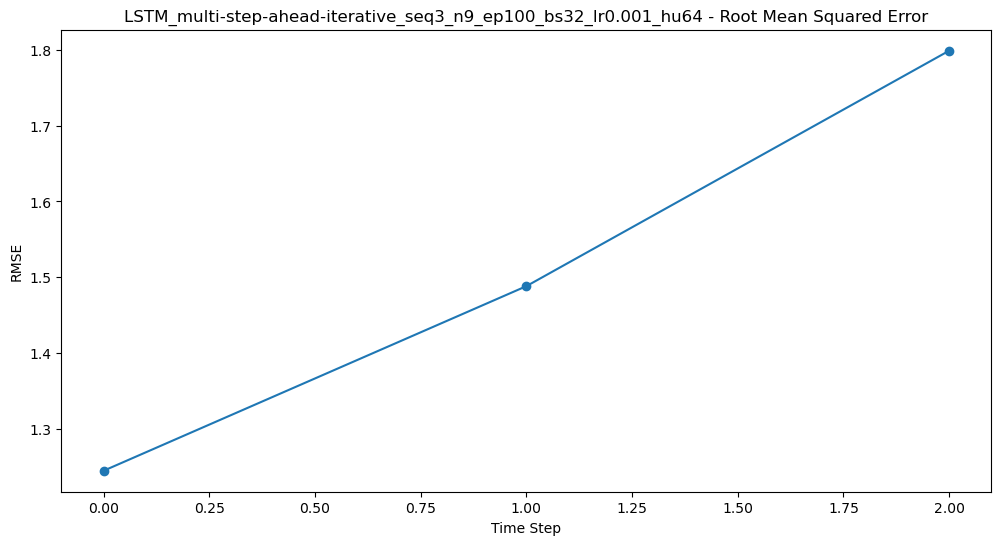

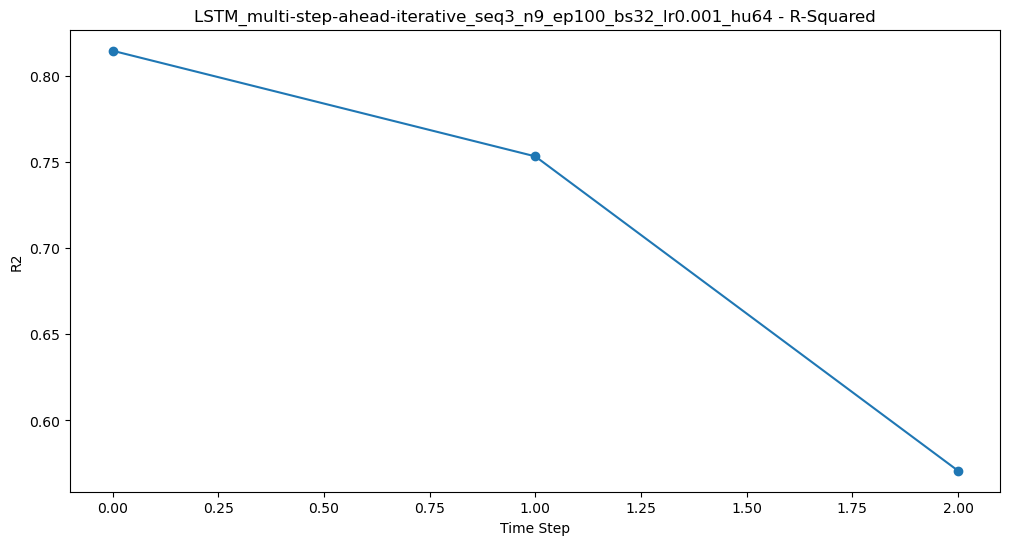

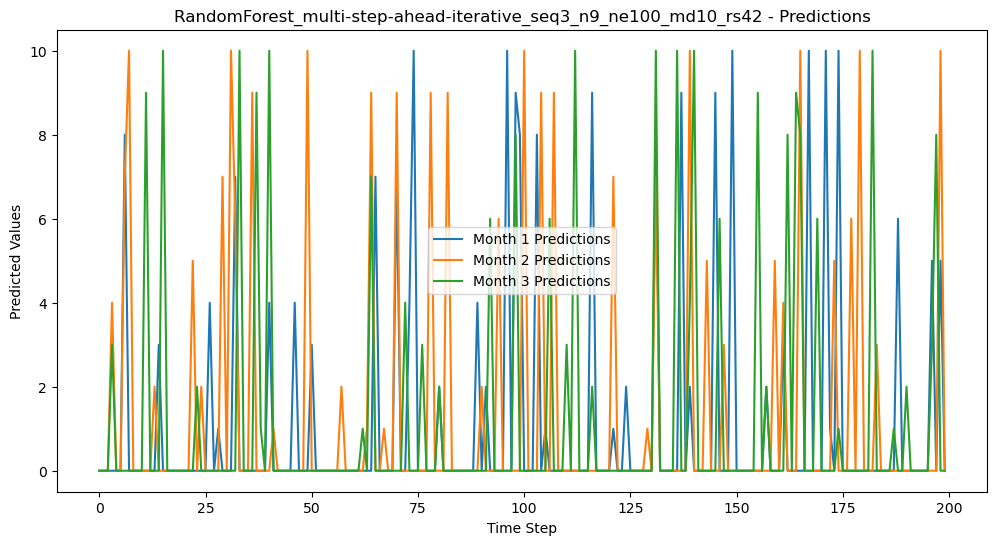

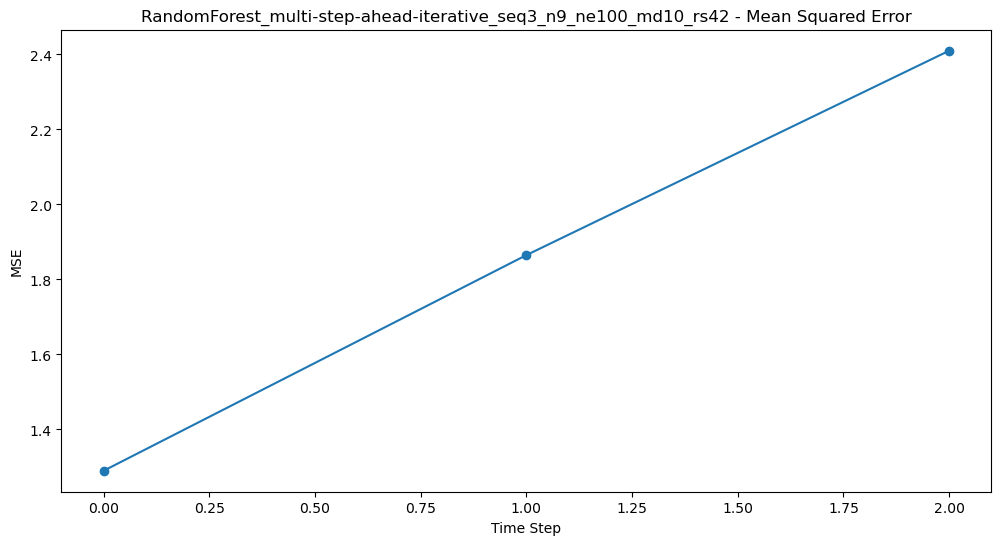

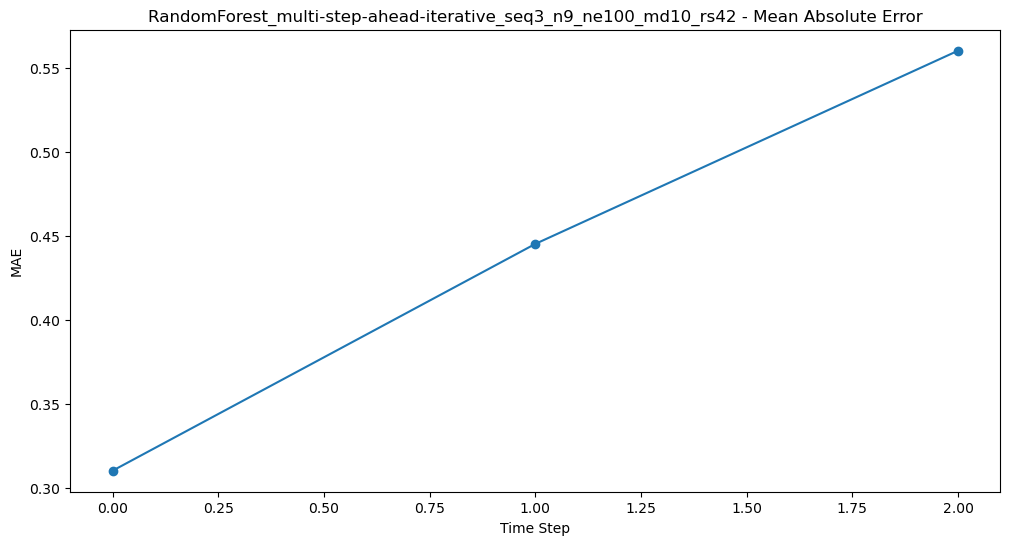

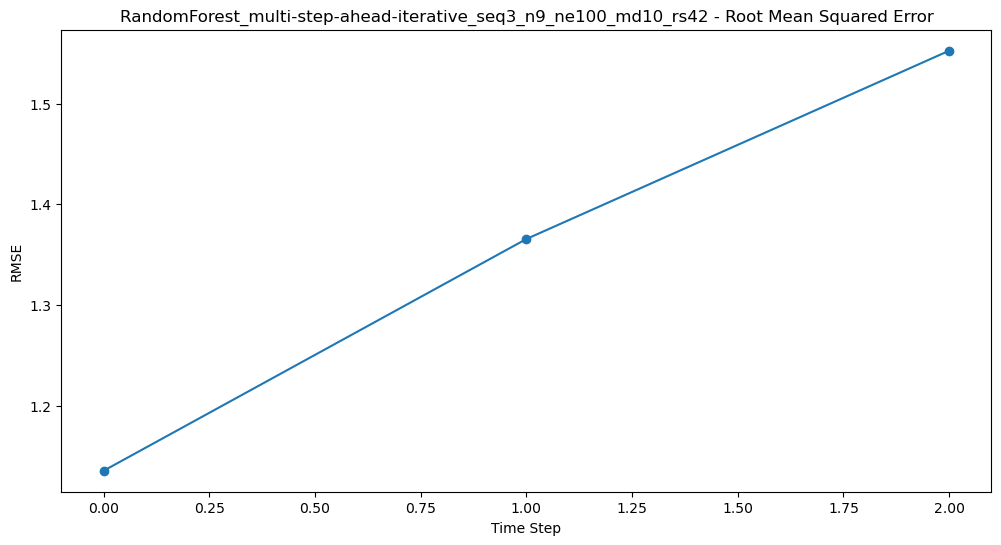

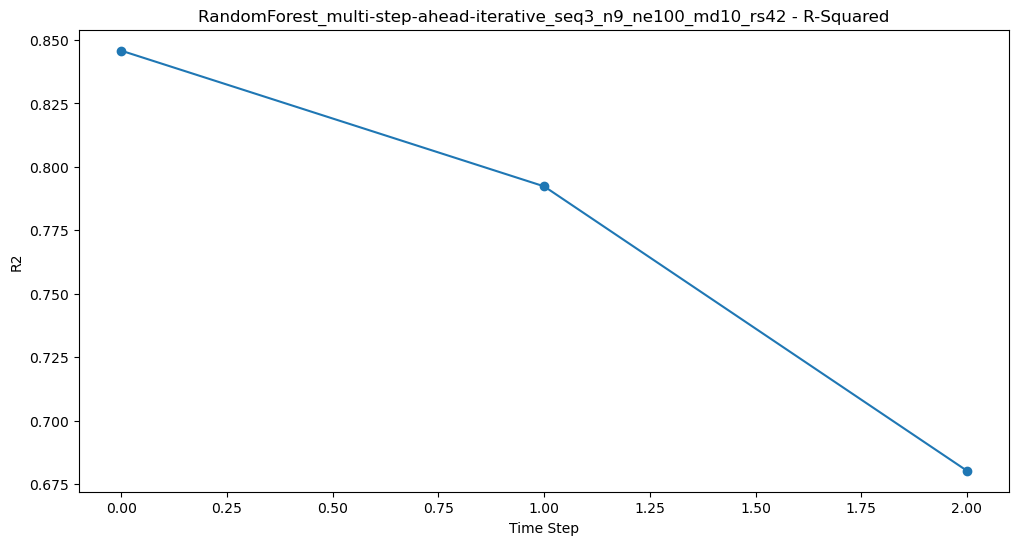

In [5]:
# List of JSON files to compare
json_files = [
    '../06_results/json/LSTM_multi-step-ahead-iterative_seq3_n9_ep100_bs32_lr0.001_hu64.json',
    '../06_results/json/RandomForest_multi-step-ahead-iterative_seq3_n9_ne100_md10_rs42.json'
]

# Load and plot each
for json_file in json_files:
    results = load_results(json_file)
    model_name = os.path.basename(json_file).replace('.json', '')
    plot_results(results, title=model_name)

### Summary

This notebook will allow you to load and visualize the results of your experiments stored in JSON files within the `06_results/json` directory. You can plot predictions, Mean Squared Error (MSE), and other relevant metrics for any JSON file by specifying the path.

You can now implement this in a Jupyter Notebook within your project directory, using the existing directory structure. Would you like to proceed with this or make any adjustments?